In [24]:
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
import requests
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from io import BytesIO

# Load Dataset

In [9]:
#Training Algorithm
X_train = np.loadtxt('input.csv', delimiter = ',')
Y_train = np.loadtxt('labels.csv', delimiter = ',')

#Testing Data
X_test = np.loadtxt('input_test.csv', delimiter = ',')
Y_test = np.loadtxt('labels_test.csv', delimiter = ',')

In [10]:
# As per the requirement the images are reshaped and converted
X_train = X_train.reshape(len(X_train), 100, 100, 3)
Y_train = Y_train.reshape(len(Y_train), 1)

X_test = X_test.reshape(len(X_test), 100, 100, 3)
Y_test = Y_test.reshape(len(Y_test), 1)

X_train = X_train/255.0
X_test = X_test/255.0

In [11]:
print("Shape of X_train: ", X_train.shape)
print("Shape of Y_train: ", Y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of Y_test: ", Y_test.shape)

Shape of X_train:  (2000, 100, 100, 3)
Shape of Y_train:  (2000, 1)
Shape of X_test:  (400, 100, 100, 3)
Shape of Y_test:  (400, 1)


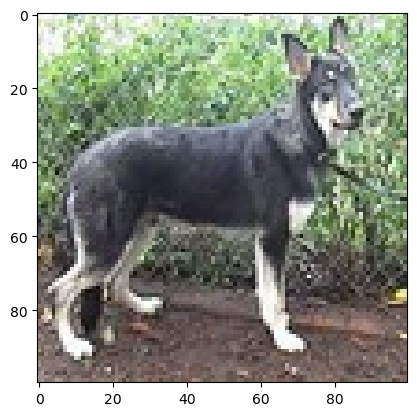

In [16]:
# Random number is generated that used as an index to point towards a specific image in the data set
idx = random.randint(0, len(X_train))
plt.imshow(X_train[idx, :])
plt.show()

# Model

In [17]:
model = Sequential([
    Conv2D(32, (3,3), activation = 'relu', input_shape = (100, 100, 3)),
    MaxPooling2D((2,2)),
    
    Conv2D(32, (3,3), activation = 'relu'),
    MaxPooling2D((2,2)),
    
    Flatten(),
    Dense(64, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = (100, 100, 3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [19]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [20]:
model.fit(X_train, Y_train, epochs = 5, batch_size = 64)

Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 77ms/step - accuracy: 0.5097 - loss: 0.8541
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - accuracy: 0.5733 - loss: 0.6816
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - accuracy: 0.5749 - loss: 0.6734
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step - accuracy: 0.6525 - loss: 0.6290
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - accuracy: 0.6839 - loss: 0.5927


In [21]:
model.evaluate(X_test, Y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6073 - loss: 0.6674


[0.5998443365097046, 0.7099999785423279]

# Making predictions

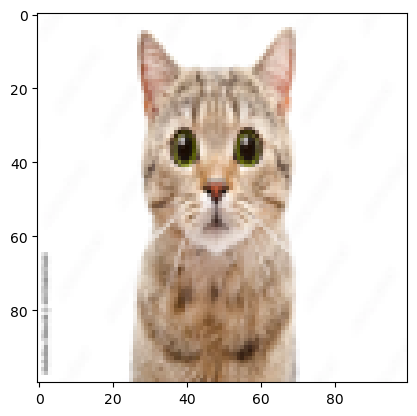

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
It is a: Billi hai andha hai kya


In [32]:
# Image URL (replace with your URL)
image_url = 'https://as2.ftcdn.net/jpg/00/97/58/97/1000_F_97589769_t45CqXyzjz0KXwoBZT9PRaWGHRk5hQqQ.webp'

# Fetch the image from the URL
response = requests.get(image_url)
img = Image.open(BytesIO(response.content))
#img = Image.open('dogscheck.png')
# Resize the image to 100x100 pixels (assuming your model expects 100x100 input)
img = img.resize((100, 100))

# Convert image to a numpy array and normalize it
img_array = np.array(img) / 255.0  # Normalize pixel values between 0 and 1

# Make sure the image has 3 color channels (RGB)
if img_array.shape[-1] != 3:
    img_array = np.stack([img_array] * 3, axis=-1)  # Convert grayscale to RGB if needed

# Display the image
plt.imshow(img)
plt.show()

# Predict using the model (reshape to the expected input shape of your model)
y_pred = model.predict(img_array.reshape(1, 100, 100, 3))

# Convert output to binary (if necessary)
y_pred = y_pred > 0.5

# Map the prediction
if y_pred == 0:
    pred = 'Dog'
else:
    pred = 'Billi hai andha hai kya'

print("It is a:", pred)